In [ ]:
!pip install diagrams

# EthPay Architecture

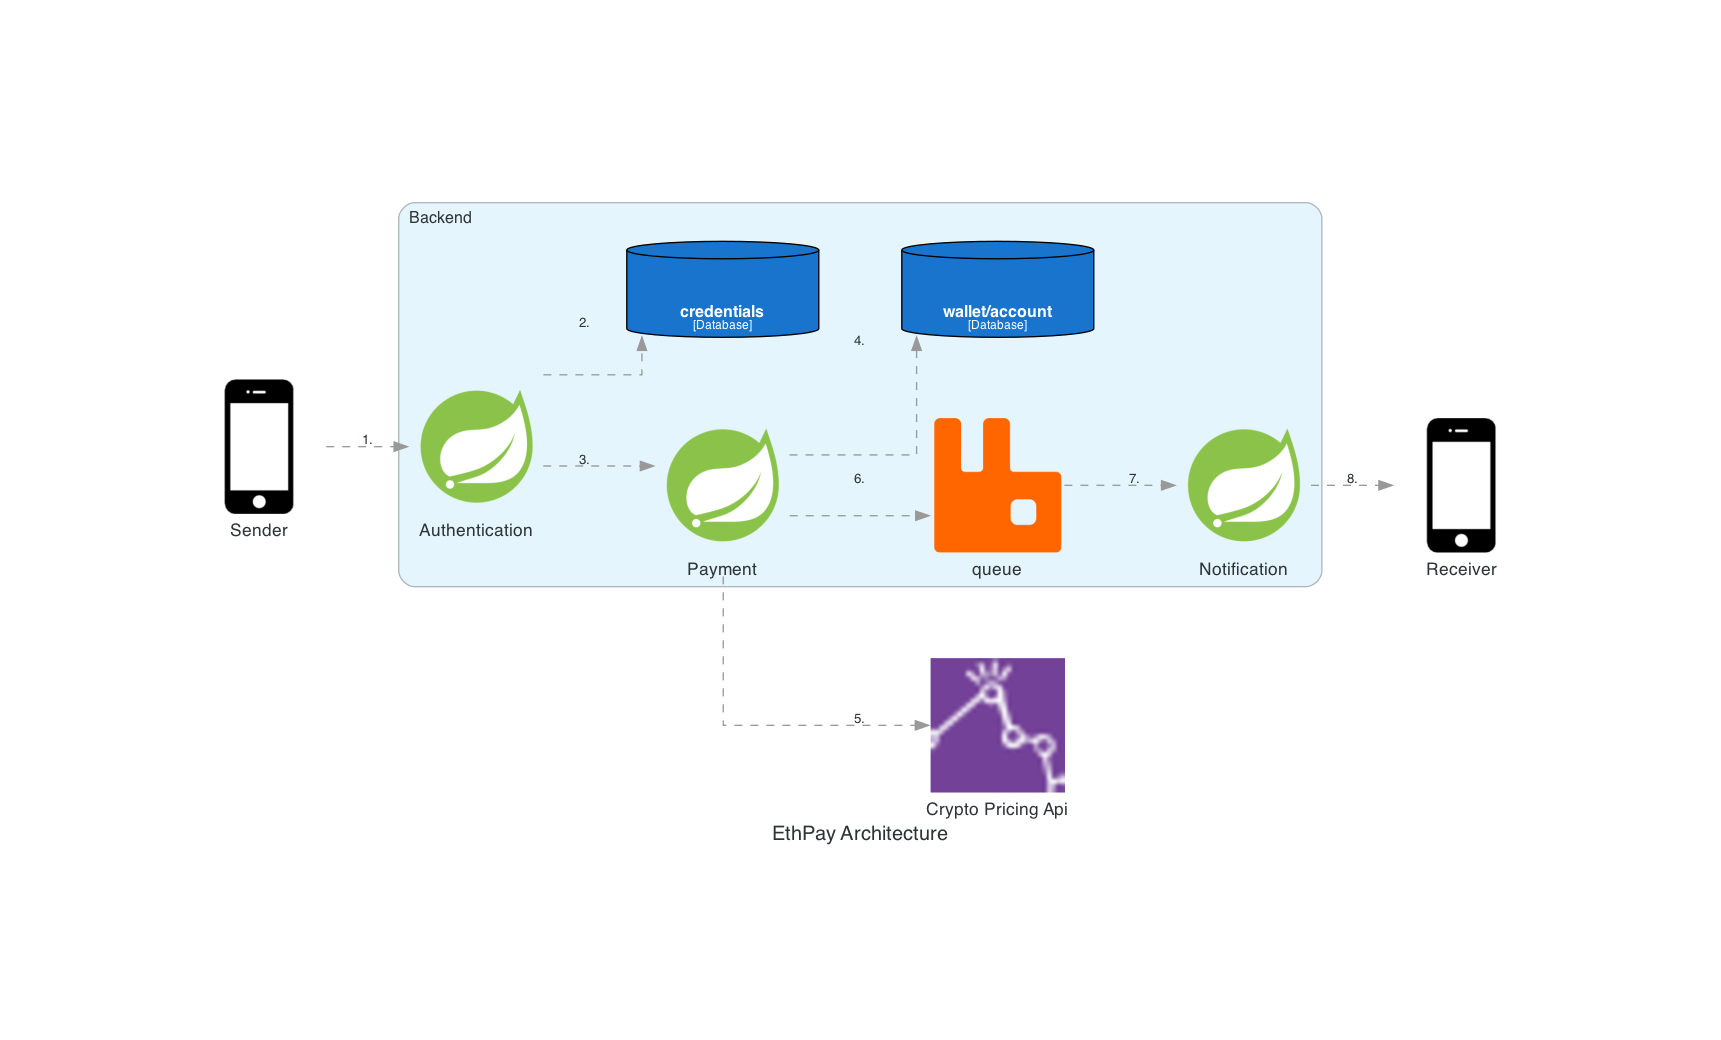

In [27]:
from diagrams import Diagram, Edge, Cluster
from diagrams.generic.device import Mobile
from diagrams.programming.framework import Spring
from diagrams.generic.compute import Rack
from diagrams.generic.network import Firewall
from diagrams.onprem.queue import Rabbitmq
from diagrams.c4 import Database, Relationship
from diagrams.ibm.analytics import Analytics

from IPython.display import Image, Markdown

with Diagram("EthPay Architecture", show=False) as diag:
    sender = Mobile("Sender")
    receiver = Mobile("Receiver")
    pricing = Analytics("Crypto Pricing Api")


    with Cluster("Backend"):

        auth = Spring("Authentication")
        payment = Spring("Payment")
        notification = Spring("Notification")
        queue = Rabbitmq("queue")
        credentials = Database("credentials")
        wallet = Database("wallet/account")
        

        auth >>  Relationship("3.") >> payment >> Relationship("6.") >> queue >> Relationship("7.") >> notification
        auth >>  Relationship("2.") >> credentials
        payment >> Relationship("4.") >> wallet

    sender >> Relationship("1.") >> auth
    payment >> Relationship("5.") >> pricing
    notification >> Relationship("8.") >>  receiver

diag_path = diag.filename + ".png"
display(Markdown("# EthPay Architecture"))

Image(diag_path)